In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.datasets import mnist

<h1>Image Related Neural Networks</h1>

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.keras.backend.clear_session()

In [5]:
input_layer = Input(shape = (40, ))
dense1 = Dense(10)(input_layer)
dense2 = Dense(10)(dense1)
dense3 = Dense(10)(dense2)

last_layer_class = Dense(4, activation = "softmax")(dense3)
last_layer_regr = Dense(1, activation = None)(dense3)

In [6]:
input_layer

<KerasTensor: shape=(None, 40) dtype=float32 (created by layer 'input_1')>

In [7]:
last_layer_class

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_3')>

In [8]:
last_layer_regr

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_4')>

In [9]:
model = Model(inputs = input_layer, outputs = [last_layer_class, last_layer_regr])

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 10)           410         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           110         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 10)           110         dense_1[0][0]                    
______________________________________________________________________________________________

In [11]:
cnn_model = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    Conv2D(32, kernel_size = (3, 3), activation = "relu"),
    Conv2D(32, kernel_size = (3, 3), activation = "relu"),
    Conv2D(16, kernel_size = (3, 3), activation = "relu"),
    Conv2D(16, kernel_size = (3, 3), activation = "relu")
])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 32)      18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 216, 216, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 214, 214, 16)      4624      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 212, 212, 16)      2320      
Total params: 73,376
Trainable params: 73,376
Non-trainable params: 0
____________________________________________________

In [13]:
model = Sequential([
    Input(shape = (224, 224, 3)),
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(16, activation = "relu"),
    Dense(16, activation = "relu"),
    
    Flatten(),
    
    Dense(30, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(5, activation = "softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                9633856   
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 16)               

In [15]:
cnn_model = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(64, kernel_size = (11, 11), padding = "same", activation = "relu"),
    Conv2D(64, kernel_size = (9, 9), padding = "same", activation = "relu"),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(32, kernel_size = (7, 7), padding = "same", activation = "relu"),
    Conv2D(32, kernel_size = (7, 7), padding = "same", activation = "relu"),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(16, kernel_size = (5, 5), padding = "same", activation = "relu"),
    Conv2D(16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    
    Flatten(),
    BatchNormalization(),
    
    Dense(30, activation = "relu"),
    Dropout(0.1),
    Dense(10, activation = "relu"),
    Dropout(0.05),
    Dense(5, activation = "softmax")
])

In [16]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 64)      23296     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 224, 224, 64)      331840    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 32)      100384    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 32)      50208     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)       

In [17]:
(attributes_train, labels_train), (attributes_test, labels_test) = mnist.load_data()

In [18]:
attributes_test.shape

(10000, 28, 28)

In [19]:
attributes_train_expanded = np.expand_dims(attributes_train, 3)

In [20]:
attributes_train_expanded = attributes_train_expanded / 255.0

In [21]:
cnn = Sequential([
    Input(shape = (28, 28, 1)),
    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
    Conv2D(32, (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(32, (3, 3), padding = "same", activation = "relu"),
    Conv2D(16, (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Flatten(),
    
    Dense(64, activation = "relu"),
    Dropout(0.05),
    Dense(10, activation = "softmax")    
])

In [22]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)              

In [23]:
np.expand_dims(attributes_train[0], 2).shape

(28, 28, 1)

In [24]:
cnn.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [25]:
cnn.fit(attributes_train_expanded, labels_train)

1875/1875 [==============================] - 27s 12ms/step - loss: 0.1385 - accuracy: 0.9561


In [26]:
cnn.layers[0].input.shape, cnn.layers[0].output.shape

(TensorShape([None, 28, 28, 1]), TensorShape([None, 28, 28, 64]))

In [27]:
cnn.layers[0].weights[0]

<tf.Variable 'conv2d_12/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
array([[[[ 0.07245106,  0.13091582, -0.01082313, -0.05640807,
           0.09191819, -0.04280686, -0.04804662, -0.03300495,
          -0.10432505, -0.0862931 , -0.06775445,  0.03489875,
           0.03415587, -0.03328973, -0.05268866,  0.12177181,
          -0.12560262,  0.08202773, -0.19225945,  0.07510281,
          -0.08348898,  0.02455931,  0.02075771, -0.10121791,
           0.03282377,  0.05150168,  0.02057743,  0.01798459,
          -0.00708495, -0.08347924, -0.00488091, -0.0437349 ,
          -0.0708254 , -0.01205081, -0.00267882,  0.08096414,
          -0.11283455,  0.00086853,  0.07690997,  0.15160662,
          -0.02565726,  0.13722678,  0.13027759,  0.08885022,
          -0.0249636 , -0.07570177,  0.05171422,  0.00265811,
          -0.04124694,  0.11155935,  0.09684388, -0.0472144 ,
           0.16336142,  0.04718442,  0.08809149,  0.03543977,
           0.06140514,  0.13595401,  0.15332909,  0.1254

In [28]:
cnn.layers[0].kernel.shape

TensorShape([3, 3, 1, 64])

In [29]:
# 3, 3, 1, 64: filter 3, 3 chanel 1, filters 64

In [30]:
# all values of filter 1
cnn.layers[0].kernel[:, :, :, 0]

<tf.Tensor: shape=(3, 3, 1), dtype=float32, numpy=
array([[[ 0.07245106],
        [ 0.19576791],
        [ 0.04495276]],

       [[ 0.01224444],
        [-0.00646374],
        [ 0.05669553]],

       [[-0.01410278],
        [-0.15113622],
        [-0.08489927]]], dtype=float32)>

In [31]:
tf.squeeze(cnn.layers[0].kernel[:, :, :, 0]).numpy()

array([[ 0.07245106,  0.19576791,  0.04495276],
       [ 0.01224444, -0.00646374,  0.05669553],
       [-0.01410278, -0.15113622, -0.08489927]], dtype=float32)

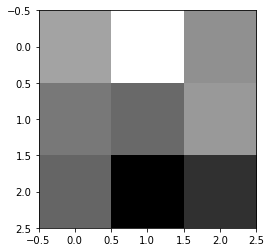

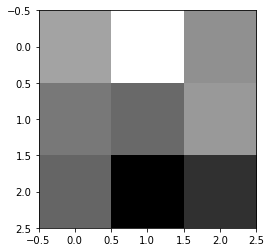

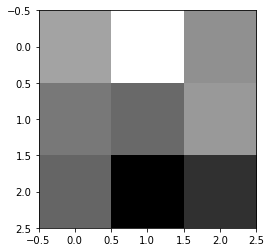

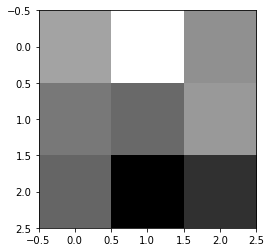

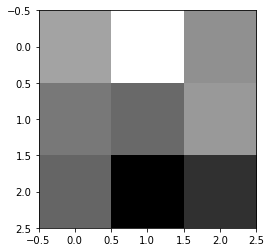

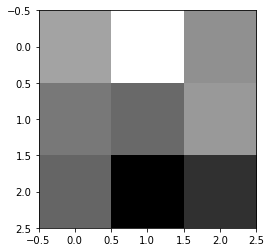

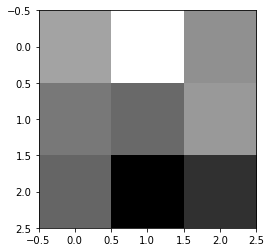

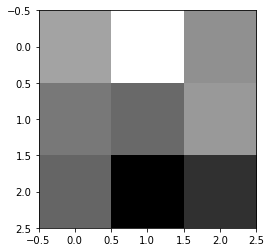

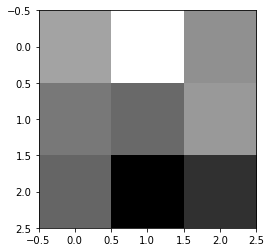

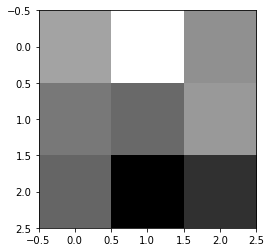

In [32]:
for i in range(10):
    filter_contents = tf.squeeze(cnn.layers[0].kernel[:, :, :, 0]).numpy()
    plt.imshow(filter_contents, cmap = "gray")
    plt.show()

## Working with Data

In [33]:
cats_dir = os.path.abspath("./")
dogs_dir = os.path.abspath("./")

image_size = (200, 200)

In [34]:
cat_filenames = [os.path.join(cats_dir, file) for file in os.listdir(cats_dir)]
dog_filenames = [os.path.join(dogs_dir, file) for file in os.listdir(dogs_dir)]

In [35]:
all_filenames = np.array(cat_filenames + dog_filenames)

In [36]:
np.random.shuffle(all_filenames)

In [37]:
def read_image(filename):
    print(filename)
    file_contents = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(file_contents)
    label = ("cat" in os.path.basename(cat_filenames[0])) + 0
    return tf.image.resize(image, image_size)

In [38]:
dataset = tf.data.Dataset.from_tensor_slices(all_filenames)

In [39]:
dataset = dataset.batch(32).prefetch(buffer_size=32)